In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd


# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append("../../")
from src.SupportPreProcesamiento import (
    exploracion_dataframe,
    separarar_df,
    plot_numericas,
    plot_categoricas,
    relacion_vr_categoricas,
    relacion_vr_numericas,
    matriz_correlacion,
    detectar_outliers,
    diferencia_tras_rellenar_nulos
)

pd.set_option('display.float_format', '{:.2f}'.format)


# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',100)


In [2]:
df = pd.read_csv("../../datos/03_api_rent_sin_nulos.csv")

# Eda sin nulos
- Veamos ahora los datos con las columnas que hemos seleccionado para la predicción
- Y también sus gráficas

In [3]:
exploracion_dataframe(df, "price")

El número de datos es 442 y el de columnas es 16

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 5

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos



 ..................... 

Los tipos de las columnas son:


,tipo_dato
propertyType,object
status,object
price,float64
size,float64
rooms,object
bathrooms,object
floor,object
district,object
province,object
municipality,object



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna PROPERTYTYPE tiene las siguientes valore únicos:


,count
propertyType,
flat,348
studio,48
duplex,19
penthouse,16
chalet,9


La columna STATUS tiene las siguientes valore únicos:


,count
status,
good,409
desconocido,18
newdevelopment,13
renew,2


La columna ROOMS tiene las siguientes valore únicos:


,count
rooms,
2 habitaciones,171
1 habitacion,135
3 habitaciones,77
sin habitaciones,49
4 habitaciones,9


La columna BATHROOMS tiene las siguientes valore únicos:


,count
bathrooms,
1 aseo,357
2 aseos,79
3 aseos,6


La columna FLOOR tiene las siguientes valore únicos:


,count
floor,
primero,94
desconocido,81
segundo,75
bajo,67
tercero,59


La columna DISTRICT tiene las siguientes valore únicos:


,count
district,
desconocido,109
Centro,48
Villaverde,23
Puente de Vallecas,17
El Quiñón,13


La columna PROVINCE tiene las siguientes valore únicos:


,count
province,
Madrid,353
Toledo,59
Guadalajara,21
Segovia,8
Ávila,1


La columna MUNICIPALITY tiene las siguientes valore únicos:


,count
municipality,
Madrid,170
Alcalá de Henares,22
Seseña,14
Parla,14
Torrejón de Ardoz,11


La columna EXTERIOR tiene las siguientes valore únicos:


,count
exterior,
vista exterior,359
vista interior,83


La columna HASLIFT tiene las siguientes valore únicos:


,count
hasLift,
tiene ascensor,226
no tiene ascensor,185
desconocido,31


La columna HASPLAN tiene las siguientes valore únicos:


,count
hasPlan,
no tiene planos,293
tiene planos,131
desconocido,18


La columna HAS3DTOUR tiene las siguientes valore únicos:


,count
has3DTour,
no tiene tour 3D,418
desconocido,18
tiene tour 3D,6


La columna HAS360 tiene las siguientes valore únicos:


,count
has360,
no tiene fotos 360,337
tiene fotos 360,87
desconocido,18


La columna DISTANCIA_CENTRO tiene las siguientes valore únicos:


,count
distancia_centro,
Entre 5 y 10 km,82
Entre 20 y 30 km,74
Entre 10 y 20 km,65
Entre 30 y 40 km,62
Entre 1 y 5 km,62


# Gráficas

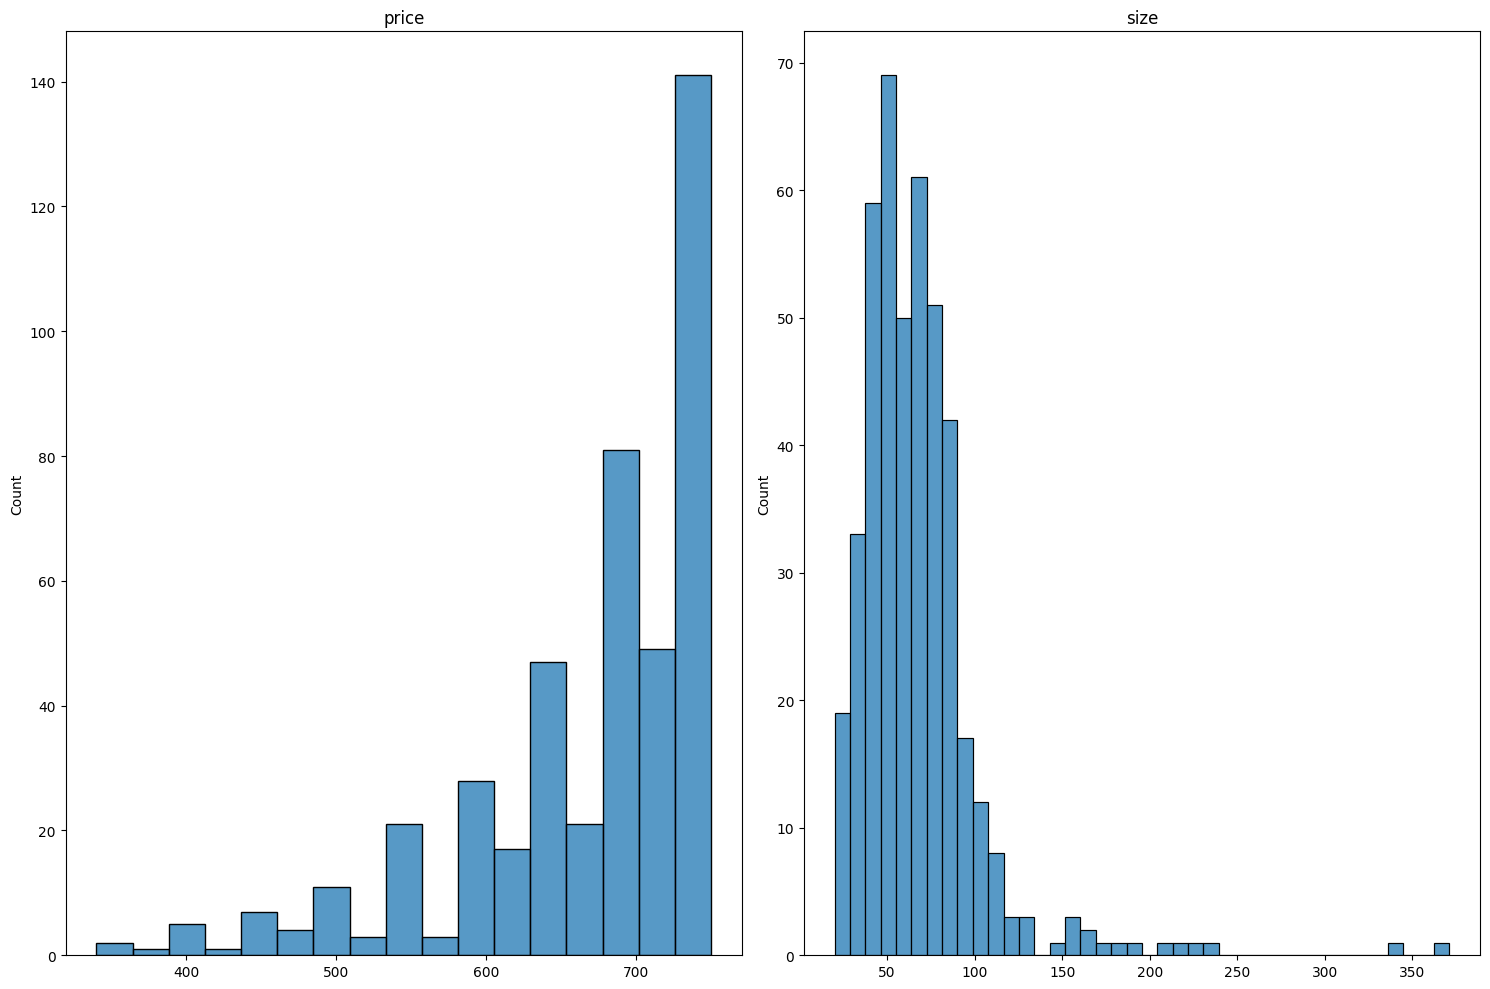

In [4]:
numericas, categoricas = separarar_df(df)
plot_numericas(numericas)

# Sobre la Gráfica
- Price y pricebyArea parecen estar bastante juntos, sin outliers muy observables
- size si parece tener más variabilidad y amplitud, con outliers

### Visualizar las categoricas con un countplot

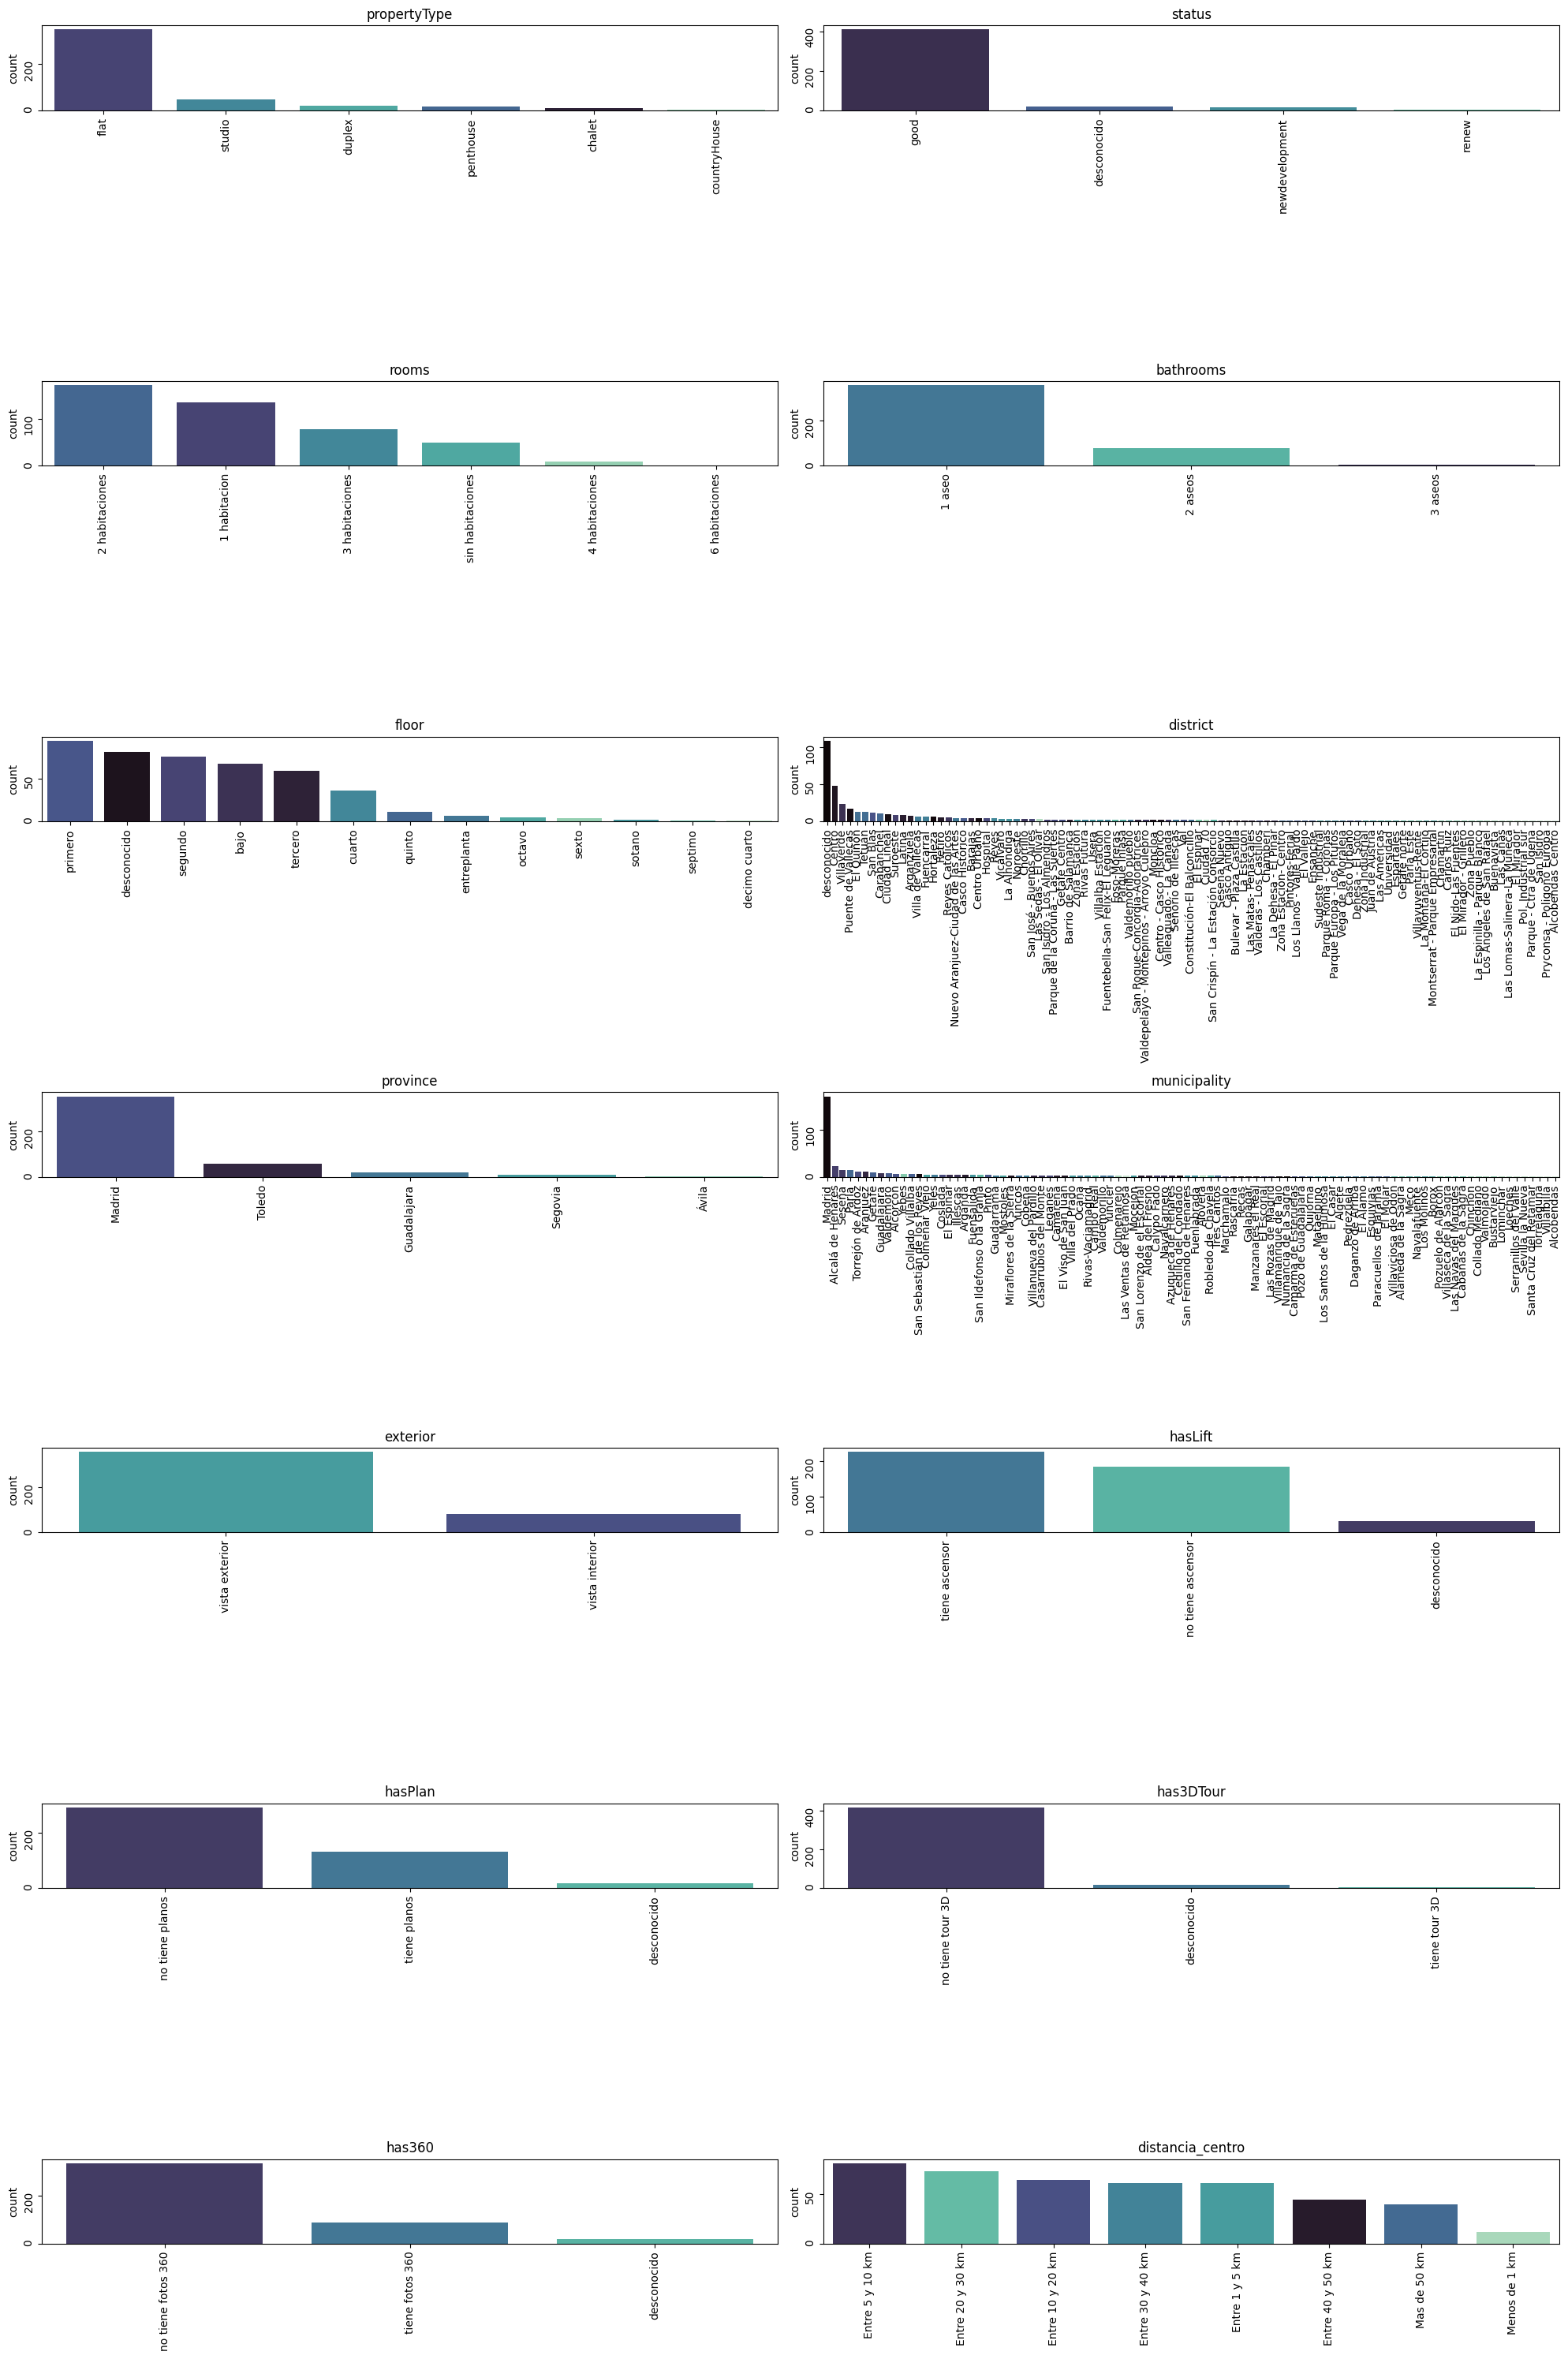

In [5]:
plot_categoricas(categoricas,grafica_size=(20,30))

# Sobre la Gráfica
- La mayoría son apartamentos
- La mayoría estan en estado good
- La mayoría tiene 2 habitaciones y 1 baño
- Los más anunciados son los primeros, tenemos muchos desconocidos
- No conocemos la mayoría de los distritos
- La mayoría son de la provincia de Madrid
- Lo mismo en el municipio casi todos son madrid
- La mayoría tienen vista exterior
- Muchos tienen ascensor pero no muchos más que los que no tienen
- La mayoría ofrecen los planos
- La mayoría no ofrece un 3DTour ni fotos 360
- La mayoría de los pisos están entre 5 y 10, per le siguen de cerca, 20 y 30, 10 y 20

### Visualizar los outliers con un boxplot

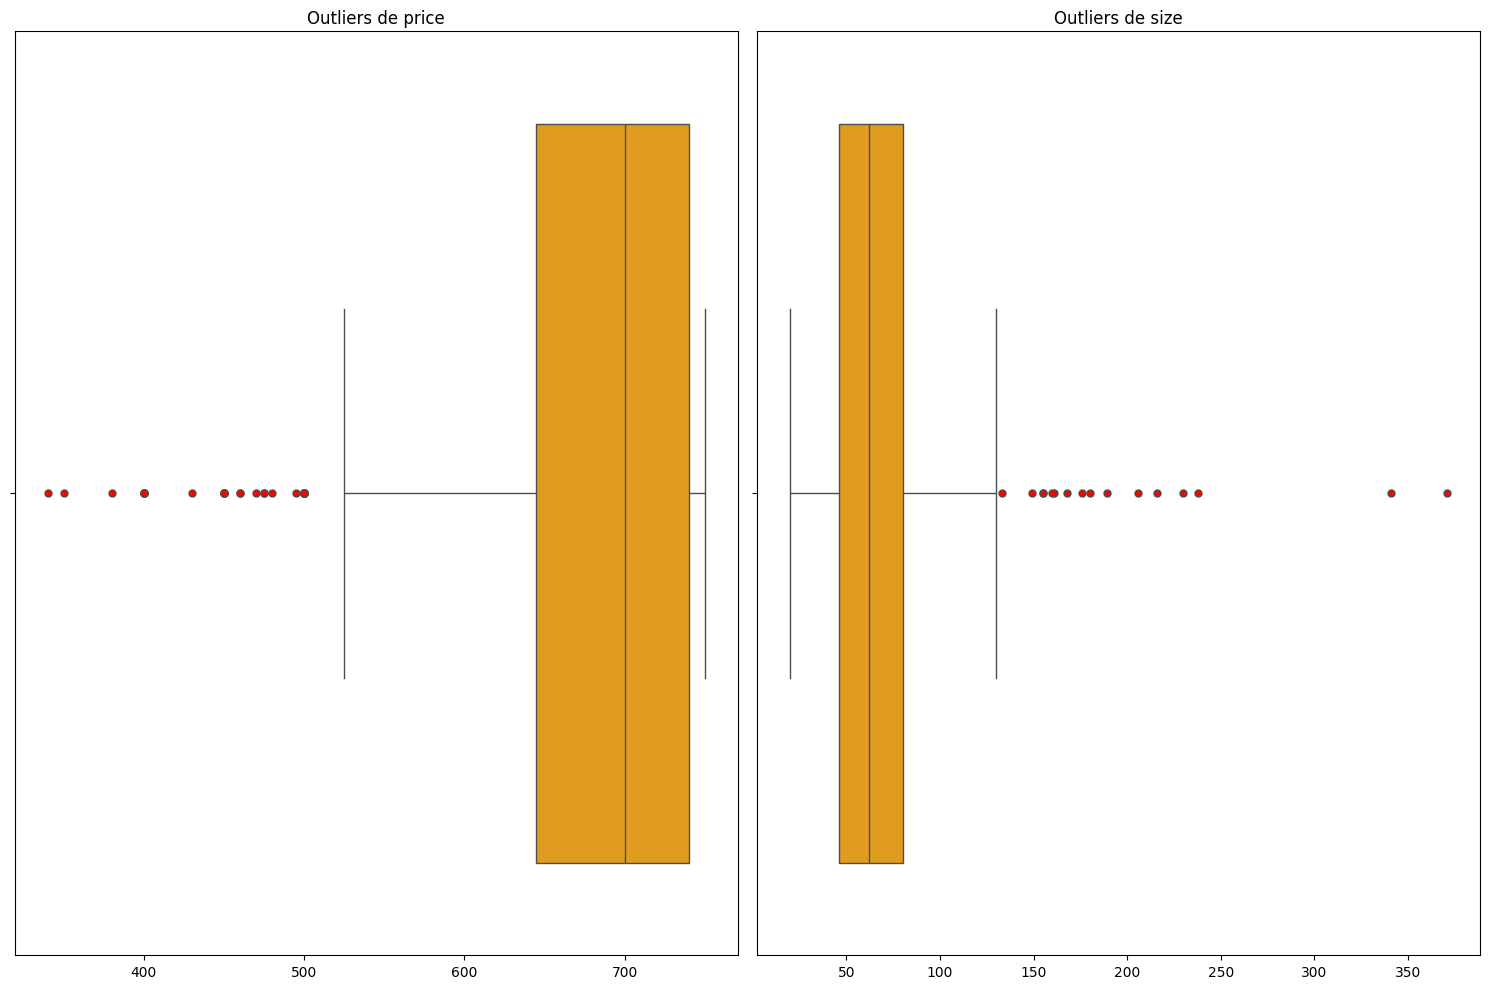

In [6]:
detectar_outliers(df)

# Sobre la gráfica
- Lo normal es que los pisos cuesten más de 500€
- Es normal que valga entre 5 y 25€ el m2
- El tamaño normal está entre 45 y 125 m2 

### Matriz Correlación

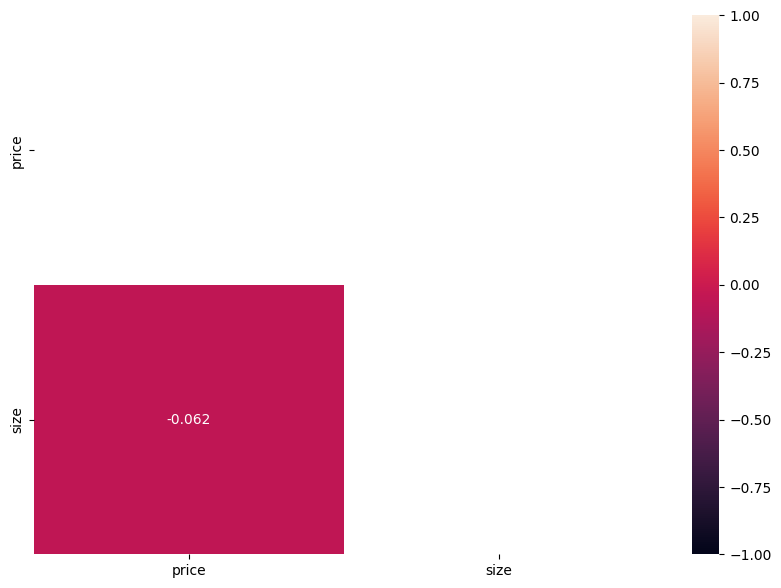

In [7]:
matriz_correlacion(df)

# Sobre la gráfica
- El precio está relacionado con el precio por m2
- el tamaño de la casa está altamente relacionado por el precio del m2

### Visualizar categoricas vs variable respuesta(barplot)
- Anotación, el plt.tight layout está puesto
- pero no se si es un bug, pero no consigo poner la gráfica bien con los tamaños
- Si quereís probadlo

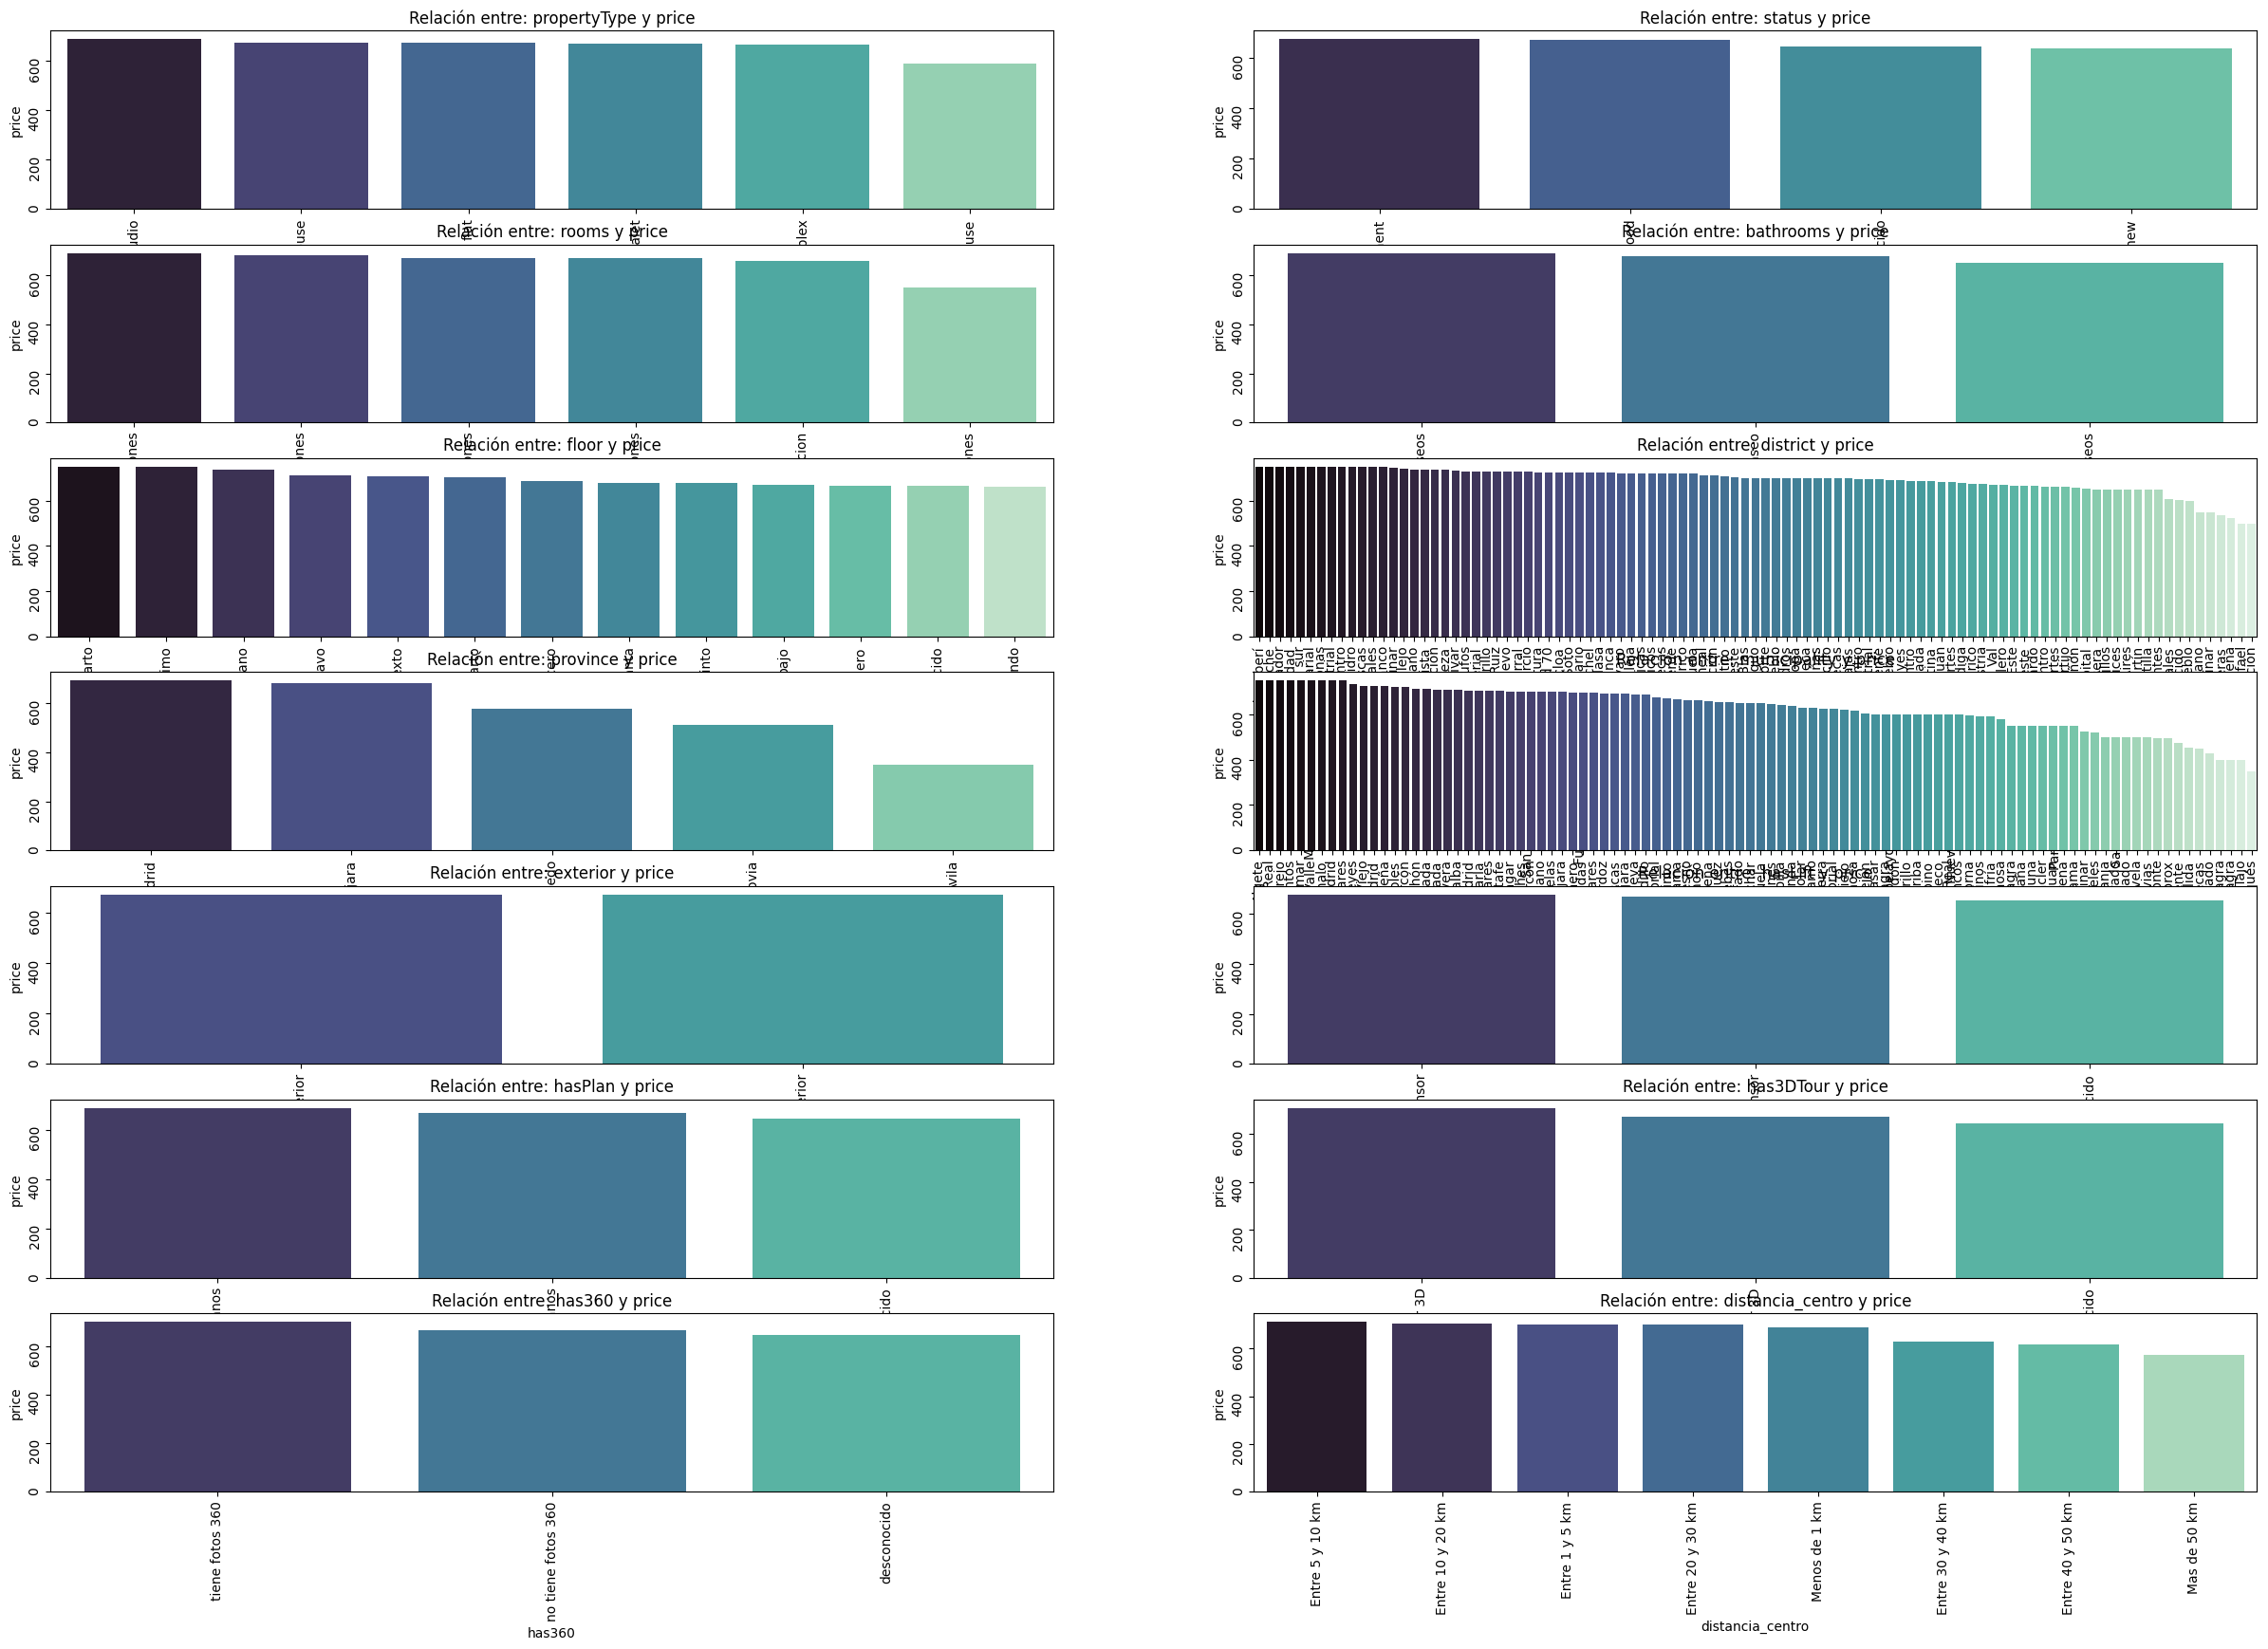

In [8]:
relacion_vr_categoricas(df,"price",grafica_size=(30,20))

# Sobre la gráfica
- Parece que no hay mucho orden, más o menos todo se relaciona igual
- Falta comprobarlo

### Visualizar numericas vs variable respuesta con un (scatterplot)

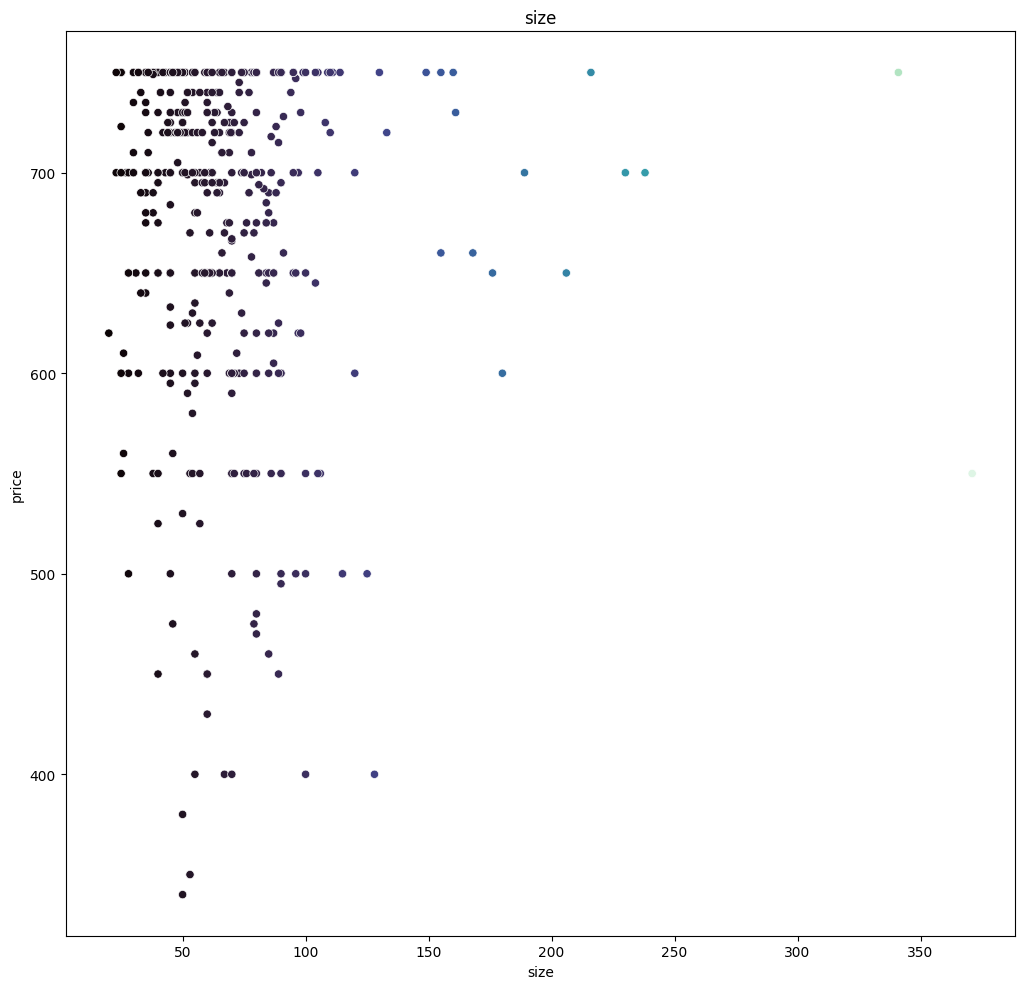

In [9]:
relacion_vr_numericas(df,"price",grafica_size=(20,10))

# Sobre la gráfica
- Como dijimos antes, parece que se relacionan lógicamente